# Scraping Met Musem
Mariam Barakat

In [21]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os
import json

### Combine all the json

In [22]:
import os
import json

# Specify the directory where your JSON files are located
json_files_directory = 'data'

# Specify the name of the output combined JSON file
output_json_file = 'combined_met.json'

# Function to normalize text
def normalize_text(text):
    try:
        # Attempt to replace en dashes with hyphens
        normalized_text = text.replace('–', '-')
    except Exception as e:
        print(f"An error occurred while normalizing text: {e}")
        normalized_text = text  # If an error occurs, keep the original text
    return normalized_text

# Initialize an empty list to store the combined and normalized data
combined_normalized_data = []

# Iterate over each JSON file in the directory
for filename in os.listdir(json_files_directory):
    if filename.endswith('.json'):
        # Construct the full path to the JSON file
        file_path = os.path.join(json_files_directory, filename)
        
        # Load the data from the current JSON file
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            
            # Normalize all text fields
            for key, value in data.items():
                if isinstance(value, str):
                    data[key] = normalize_text(value)

            # Add a "Path" key with the file name to each dictionary
            data['Path'] = filename
            
            # Append the data from the current file to the combined_normalized_data list
            combined_normalized_data.append(data)

# Write the combined and normalized data to the output JSON file
with open(output_json_file, 'w', encoding='utf-8') as output_file:
    json.dump(combined_normalized_data, output_file, indent=2, ensure_ascii=False)

print(f'Combined and normalized data with "Path" key written to {output_json_file}')


Combined and normalized data with "Path" key written to combined_met.json


### Normalize the json file

In [23]:
import json
import pandas as pd
data = json.load(open('combined_met.json',encoding="utf8"))

In [24]:
# Load your JSON file
input_json_file = 'combined_met.json'

with open(input_json_file, 'r') as file:
    data = json.load(file)

# Find all unique keys in the list of dictionaries
all_keys = set()
for item in data:
    all_keys.update(item.keys())

# Convert the set of keys to a list if needed
all_keys_list = list(all_keys)

# Print or use the list of keys
print("All keys available in the JSON file:")
print(all_keys_list)


All keys available in the JSON file:
['linkResource', 'primaryImageSmall', 'objectBeginDate', 'objectName', 'dimensions', 'geographyType', 'river', 'GalleryNumber', 'rightsAndReproduction', 'objectWikidata_URL', 'objectURL', 'title', 'county', 'department', 'artistULAN_URL', 'excavation', 'objectDate', 'artistPrefix', 'artistAlphaSort', 'constituents', 'artistNationality', 'city', 'artistDisplayBio', 'dynasty', 'tags', 'isTimelineWork', 'state', 'artistSuffix', 'isHighlight', 'artistRole', 'locus', 'accessionNumber', 'subregion', 'measurements', 'country', 'artistWikidata_URL', 'locale', 'accessionYear', 'creditLine', 'Path', 'objectEndDate', 'medium', 'classification', 'repository', 'isPublicDomain', 'artistBeginDate', 'primaryImage', 'artistDisplayName', 'artistGender', 'metadataDate', 'additionalImages', 'culture', 'artistEndDate', 'region', 'portfolio', 'reign', 'objectID', 'period']


In [25]:
print(len(all_keys_list))

58


In [26]:
# Load your JSON file
input_json_file = 'combined_met.json'
output_json_file = 'combined_met.json'

with open(input_json_file, 'r') as file:
    data = json.load(file)

# Find all unique keys in the list of dictionaries
all_keys = set()
for item in data:
    all_keys.update(item.keys())

# Normalize the list of dictionaries
normalized_data = []
for item in data:
    normalized_item = {key: item.get(key, '') for key in all_keys}
    normalized_data.append(normalized_item)

# Write the normalized data to a new JSON file
with open(output_json_file, 'w') as output_file:
    json.dump(normalized_data, output_file, indent=2)

print(f'Normalized data written to {output_json_file}')

Normalized data written to combined_met.json


### Converting to dataframe

In [27]:
import json
import pandas as pd
data = json.load(open('combined_met.json',encoding="utf8"))

In [28]:
df = pd.DataFrame(data)

In [29]:
df

,linkResource,primaryImageSmall,objectBeginDate,objectName,dimensions,geographyType,river,GalleryNumber,rightsAndReproduction,objectWikidata_URL,...,artistGender,metadataDate,additionalImages,culture,artistEndDate,region,portfolio,reign,objectID,period
0,,https://images.metmuseum.org/CRDImages/eg/web-...,-664,"Bastet, standing, aegis, basket",H. 11 Ã— W. 3.8 Ã— D. 2.7 cm (4 5/16 Ã— 1 1/2 ...,From,,,,,...,,2021-07-17T04:40:49.67Z,[https://images.metmuseum.org/CRDImages/eg/ori...,,,,,,329767,Late Period (Saite)-Ptolemaic Period
1,,https://images.metmuseum.org/CRDImages/eg/web-...,-1850,Upper half of a woman from a pair or group statue,H. 6.5 Ã— W. 4.7 Ã— D. 4.6 cm (2 9/16 Ã— 1 7/8...,From,,106,,https://www.wikidata.org/wiki/Q116408028,...,,2023-02-07T04:46:51.34Z,[https://images.metmuseum.org/CRDImages/eg/ori...,,,,,,329768,Late Middle Kingdom
2,,https://images.metmuseum.org/CRDImages/eg/web-...,-664,Head from a figure of Osiris,H. 8.6 Ã— W. 5.2 Ã— D. 4.3 cm (3 3/8 Ã— 2 1/16...,From,,130,,https://www.wikidata.org/wiki/Q116408043,...,,2023-02-07T04:46:51.34Z,[],,,,,,329769,Late Period (Saite)
3,,https://images.metmuseum.org/CRDImages/eg/web-...,-664,"figure, Osiris",H. 11.5 Ã— W. 3.3 Ã— D. 2.3 cm (4 1/2 Ã— 1 5/1...,From,,,,,...,,2021-07-17T04:40:49.67Z,[https://images.metmuseum.org/CRDImages/eg/ori...,,,,,,329771,Late Period-Ptolemaic Period
4,,https://images.metmuseum.org/CRDImages/eg/web-...,-1850,Head and chest of a shabti figure,H. 5.8 Ã— W. 4.5 Ã— D. 4.4 cm (2 5/16 Ã— 1 3/4...,From,,106,,https://www.wikidata.org/wiki/Q116408082,...,,2023-02-07T04:46:51.34Z,[],,,,,,329774,Middle Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15163,,https://images.metmuseum.org/CRDImages/is/web-...,1800,Dress,Overall: H. 51 in. (129.5 cm) \r\n ...,Made in,,,,,...,,2023-06-27T04:56:44.237Z,[https://images.metmuseum.org/CRDImages/is/ori...,,,,,,85658,
15164,,https://images.metmuseum.org/CRDImages/is/web-...,1800,Dress,Dress:\r\n L. 60 1/2 in. (153.7 cm)\...,Made in,,,,,...,,2023-06-29T04:56:37.033Z,[https://images.metmuseum.org/CRDImages/is/ori...,,,,,,85659,
15165,,https://images.metmuseum.org/CRDImages/eg/web-...,-664,Figure of a rearing cobra with feline head,Cobra: 7 cm (2 3/4 in.); Tangs: 4 cm (1 9/16 in.),From,,,,,...,,2023-07-26T04:54:41.623Z,[https://images.metmuseum.org/CRDImages/eg/ori...,,,,,,857670,Late Period - Ptolemaic Period
15166,,https://images.metmuseum.org/CRDImages/eg/web-...,-1550,gold foil fragments,H. 6.5 Ã— W. 6 cm (2 9/16 Ã— 2 3/8 in.),From,,,,https://www.wikidata.org/wiki/Q116425343,...,,2023-11-22T04:56:59.923Z,[],,,"Upper Egypt, Thebes",,,905798,New Kingdom


#### Explore null

In [30]:
empty_string_percentage = ((df == '').sum() / len(df)) * 100
print(empty_string_percentage )

linkResource             100.000000
primaryImageSmall          0.000000
objectBeginDate            0.000000
objectName                 0.171414
dimensions                12.585707
geographyType              0.000000
river                    100.000000
GalleryNumber             48.991297
rightsAndReproduction    100.000000
objectWikidata_URL        46.551951
objectURL                  0.000000
title                      0.013186
county                   100.000000
department                 0.000000
artistULAN_URL            98.536392
excavation                47.409019
objectDate                 0.046150
artistPrefix              99.993407
artistAlphaSort           98.206751
constituents               0.000000
artistNationality         99.874736
city                      95.365243
artistDisplayBio          98.931962
dynasty                   35.733122
tags                       0.000000
isTimelineWork             0.000000
state                    100.000000
artistSuffix              99

#### Drop useless

In [31]:
df.columns

Index(['linkResource', 'primaryImageSmall', 'objectBeginDate', 'objectName',
       'dimensions', 'geographyType', 'river', 'GalleryNumber',
       'rightsAndReproduction', 'objectWikidata_URL', 'objectURL', 'title',
       'county', 'department', 'artistULAN_URL', 'excavation', 'objectDate',
       'artistPrefix', 'artistAlphaSort', 'constituents', 'artistNationality',
       'city', 'artistDisplayBio', 'dynasty', 'tags', 'isTimelineWork',
       'state', 'artistSuffix', 'isHighlight', 'artistRole', 'locus',
       'accessionNumber', 'subregion', 'measurements', 'country',
       'artistWikidata_URL', 'locale', 'accessionYear', 'creditLine', 'Path',
       'objectEndDate', 'medium', 'classification', 'repository',
       'isPublicDomain', 'artistBeginDate', 'primaryImage',
       'artistDisplayName', 'artistGender', 'metadataDate', 'additionalImages',
       'culture', 'artistEndDate', 'region', 'portfolio', 'reign', 'objectID',
       'period'],
      dtype='object')

In [32]:
len(list(df.columns))

58

In [33]:
for i in list(df.columns):
    x = df[i].value_counts()
    print("**************************",i, len(x), "=============================")
    print(x)

************************** linkResource 1 =============================
linkResource
    15168
Name: count, dtype: int64
************************** primaryImageSmall 14792 =============================
primaryImageSmall
https://images.metmuseum.org/CRDImages/eg/web-large/LC-16_7_13a_EGDP031773.jpg    28
https://images.metmuseum.org/CRDImages/eg/web-large/1970.52.7.jpg                 22
https://images.metmuseum.org/CRDImages/eg/web-large/LC-04_18_27_EGDP036229.jpg    13
https://images.metmuseum.org/CRDImages/eg/web-large/Images-Restricted.jpg         12
https://images.metmuseum.org/CRDImages/eg/web-large/20-3-845-856.jpg              12
                                                                                  ..
https://images.metmuseum.org/CRDImages/eg/web-large/34.1.169_view_1.jpg            1
https://images.metmuseum.org/CRDImages/eg/web-large/34.1.170.jpg                   1
https://images.metmuseum.org/CRDImages/eg/web-large/34.1.173.jpg                   1
https://images.

In [34]:
# Filter rows where any of the specified columns have non-empty string values
# there are items that are artist made so we are removing them
columns_to_check = ['artistDisplayName', 'artistDisplayBio', 'artistULAN_URL', 'artistNationality']
df = df[df[columns_to_check].applymap(lambda x: x == '').all(axis=1)]
df = df.drop(columns= ["primaryImageSmall","constituents","tags","geographyType","isHighlight", "locale", "objectURL" , "isTimelineWork", "primaryImage", "objectWikidata_URL", "additionalImages","objectWikidata_URL", 'artistDisplayName', 'artistDisplayBio', 'artistULAN_URL', 'artistNationality',"artistAlphaSort", "objectID", "excavation", "measurements", "metadataDate", "accessionYear", "GalleryNumber", "river", "objectEndDate", "artistSuffix", "artistWikidata_URL", "artistRole", "objectBeginDate", "accessionNumber", "dimensions", "linkResource", "artistBeginDate", "artistPrefix", "isPublicDomain", "culture", "state", "artistEndDate", "repository", "creditLine", "artistGender", "rightsAndReproduction", "county", "country", "department", "portfolio" ])

C:\Users\maria\AppData\Local\Temp\ipykernel_14592\3463055626.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[df[columns_to_check].applymap(lambda x: x == '').all(axis=1)]


In [35]:
for i in list(df.columns):
    x = df[i].value_counts()
    print("**************************",i, len(x), "=============================")
    print(x)

************************** objectName 5576 =============================
objectName
Textile fragment                                       1424
Sealing                                                 580
Fragment                                                405
Shabti, worker, Nauny                                   257
Ceramic fragment                                        214
                                                       ... 
Cowroid, Hatshepsut FD, vultures, ankh; falcon back       1
Scarab; spirals; simple back                              1
Scarab; Neferure, God's Wifets; detailed back             1
Scarab; Neferure; simple back                             1
gold foil fragments                                       1
Name: count, Length: 5576, dtype: int64
************************** title 6076 =============================
title
Textile Fragment                                          1152
Sealing                                                    578
Worker Shabti of

In [36]:
df.columns

Index(['objectName', 'title', 'objectDate', 'city', 'dynasty', 'locus',
       'subregion', 'Path', 'medium', 'classification', 'region', 'reign',
       'period'],
      dtype='object')

In [37]:
empty_string_percentage = ((df == '').sum() / len(df)) * 100
print(empty_string_percentage )

objectName         0.174544
title              0.013426
objectDate         0.046992
city              95.300752
dynasty           36.318475
locus             67.709452
subregion         44.085661
Path               0.000000
medium             0.013426
classification    77.369764
region            41.031149
reign             67.984694
period            22.630236
dtype: float64


### Cleaning Data

In [38]:
import pandas as pd
import re

# Define a function to clean the values
def clean_period(value):
    # You can customize this function based on your specific needs
    if pd.isna(value) or value == '' or value == "UNSPECIFIED":
        return 'unknown'
    # Here, we are removing text inside parentheses and question marks
    cleaned_value = re.sub(r'\([^)]*\)|\?', '', value)
    # Strip everything after the first semicolon
    cleaned_value = cleaned_value.split(';', 1)[0]
    cleaned_value = cleaned_value.split('/', 1)[0]
    
    
    return cleaned_value.strip()



In [39]:
def find_unique(col):
    unique_values_count = df[col].value_counts()
    # Convert the result to a DataFrame for better formatting
    result_df = pd.DataFrame({'Unique Values': unique_values_count.index, 'Count': unique_values_count.values})
    result_df = result_df.sort_values(by='Unique Values', ascending=True)
    result_df.to_csv(f"cleaning\{col}.csv")
    # Print the result
    return result_df, len(unique_values_count)

#### clean

In [40]:
for i in list(df.columns):
    df_temp, len_temp = find_unique(i)
    print(i, len_temp)
    # Apply the clean function to the 'period' column
    df[i] = df[i].apply(clean_period)
    df_temp, len_temp = find_unique(i)
    print(i, len_temp)

objectName

 5576
objectName 5343
title 6076
title 5970
objectDate 1186
objectDate 1158
city 56
city 53
dynasty 292
dynasty 270
locus 938
locus 882
subregion 112
subregion 109
Path 14896
Path 14896
medium 1805
medium 1365
classification 26
classification 26
region 26
region 25
reign 274
reign 266
period 223
period 204


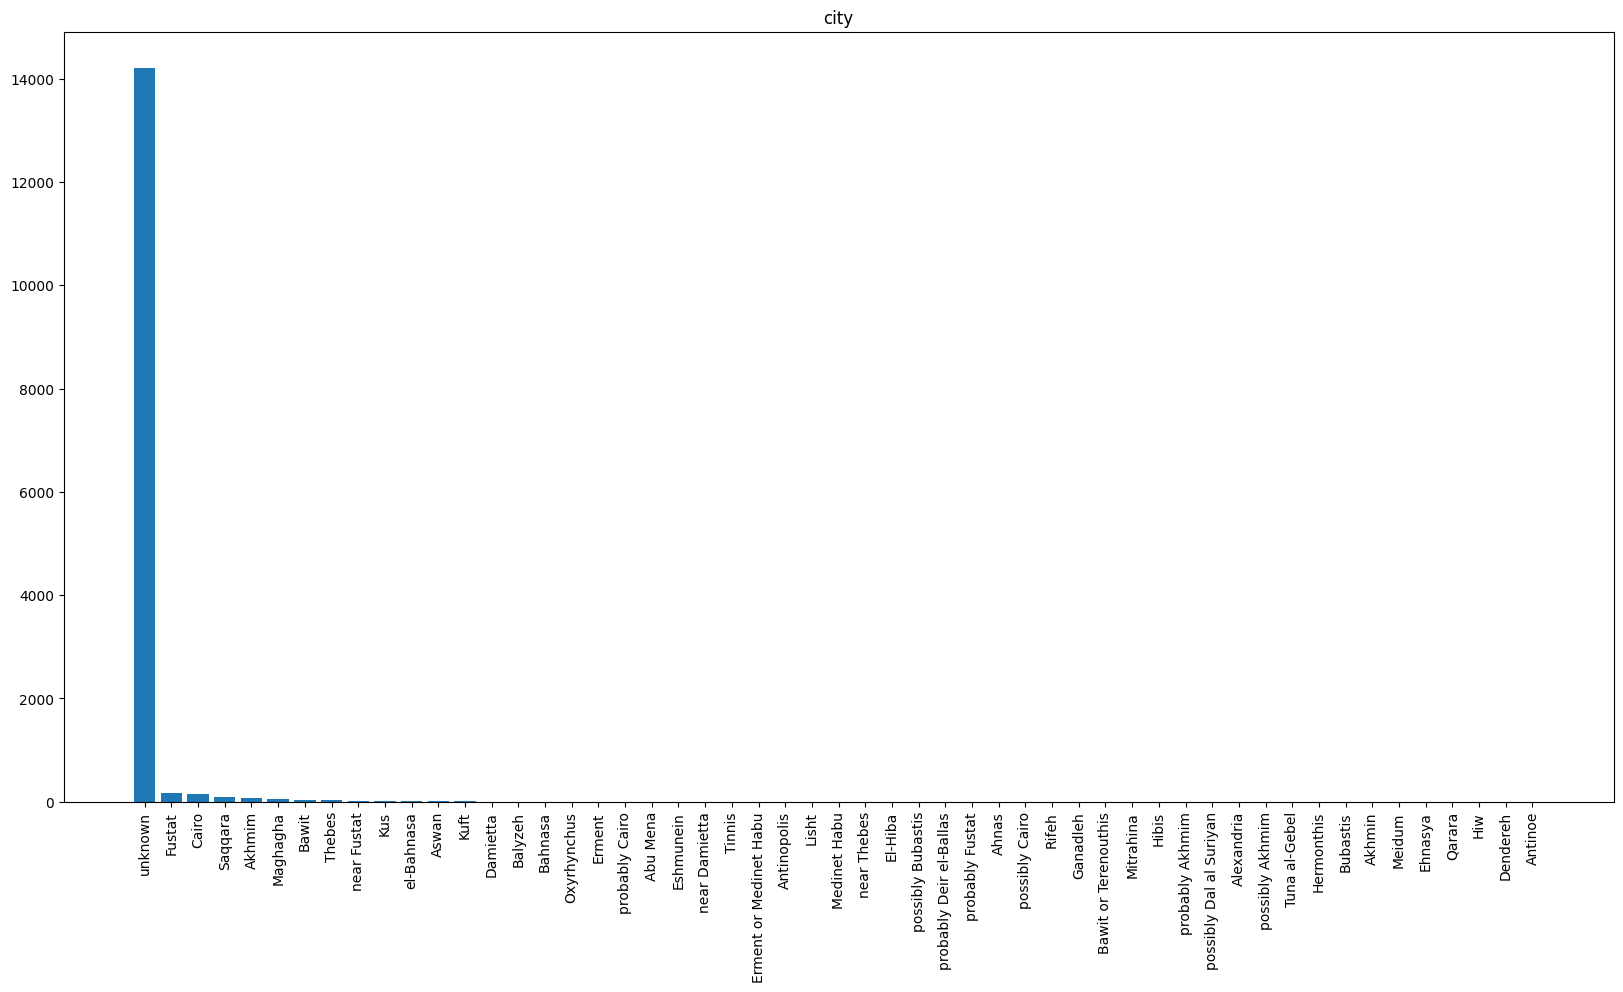

hi dynasty


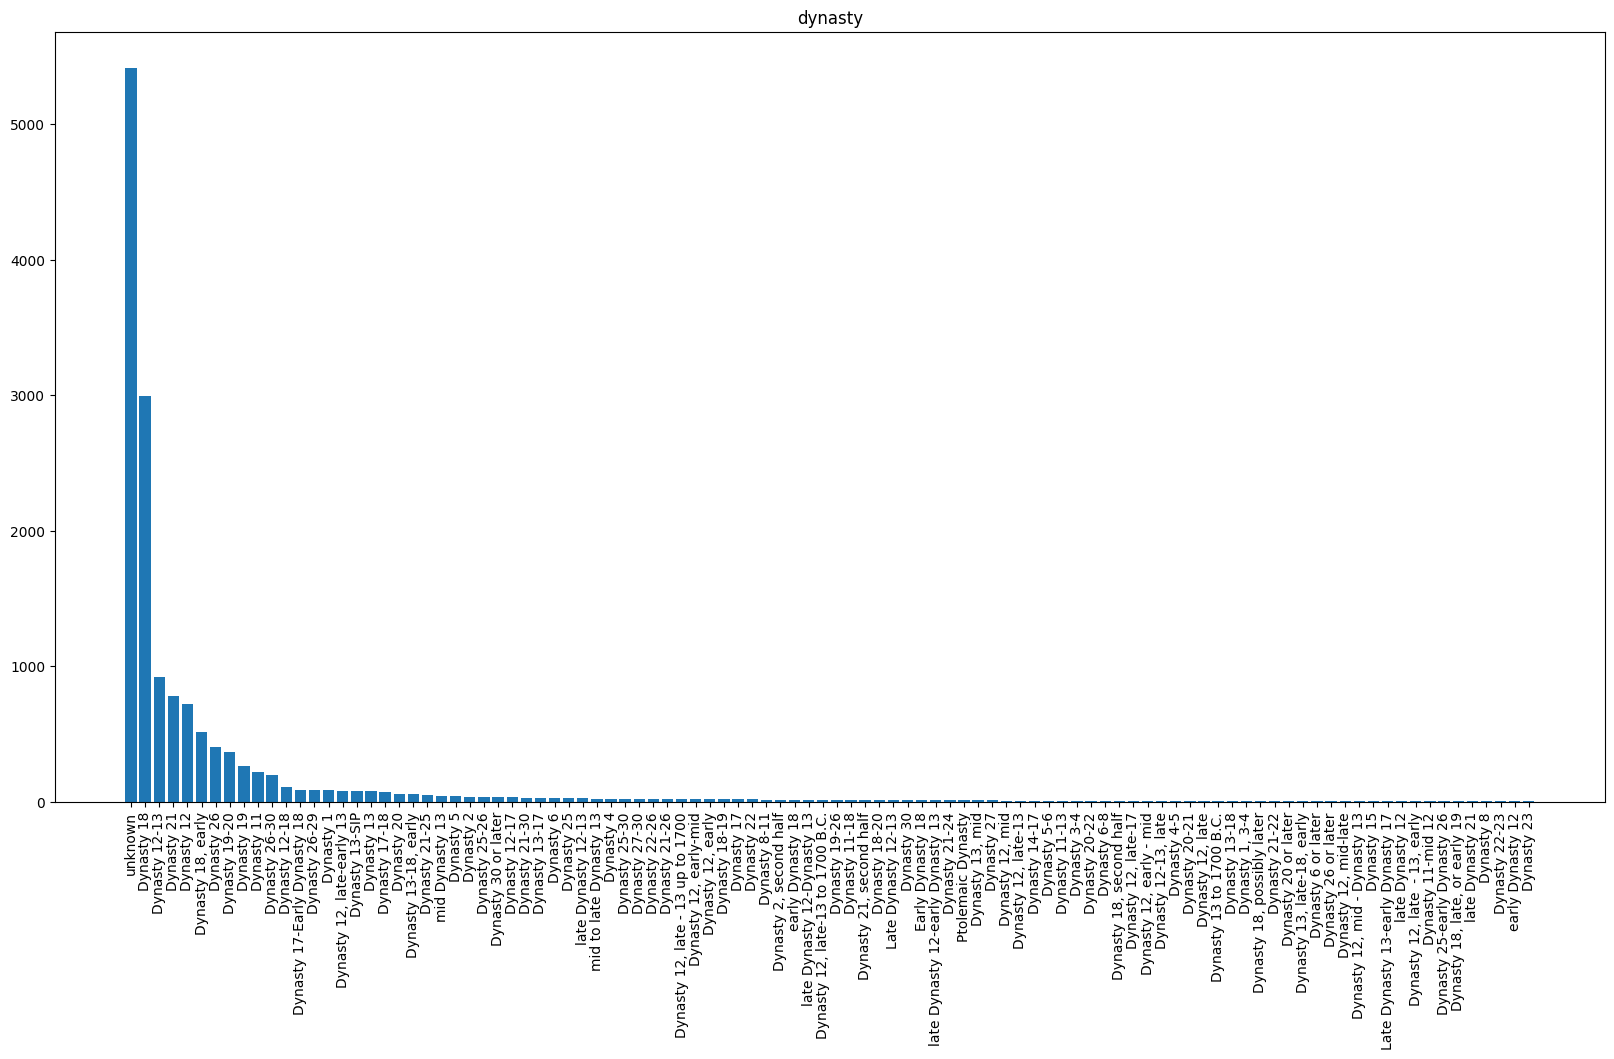

hi subregion


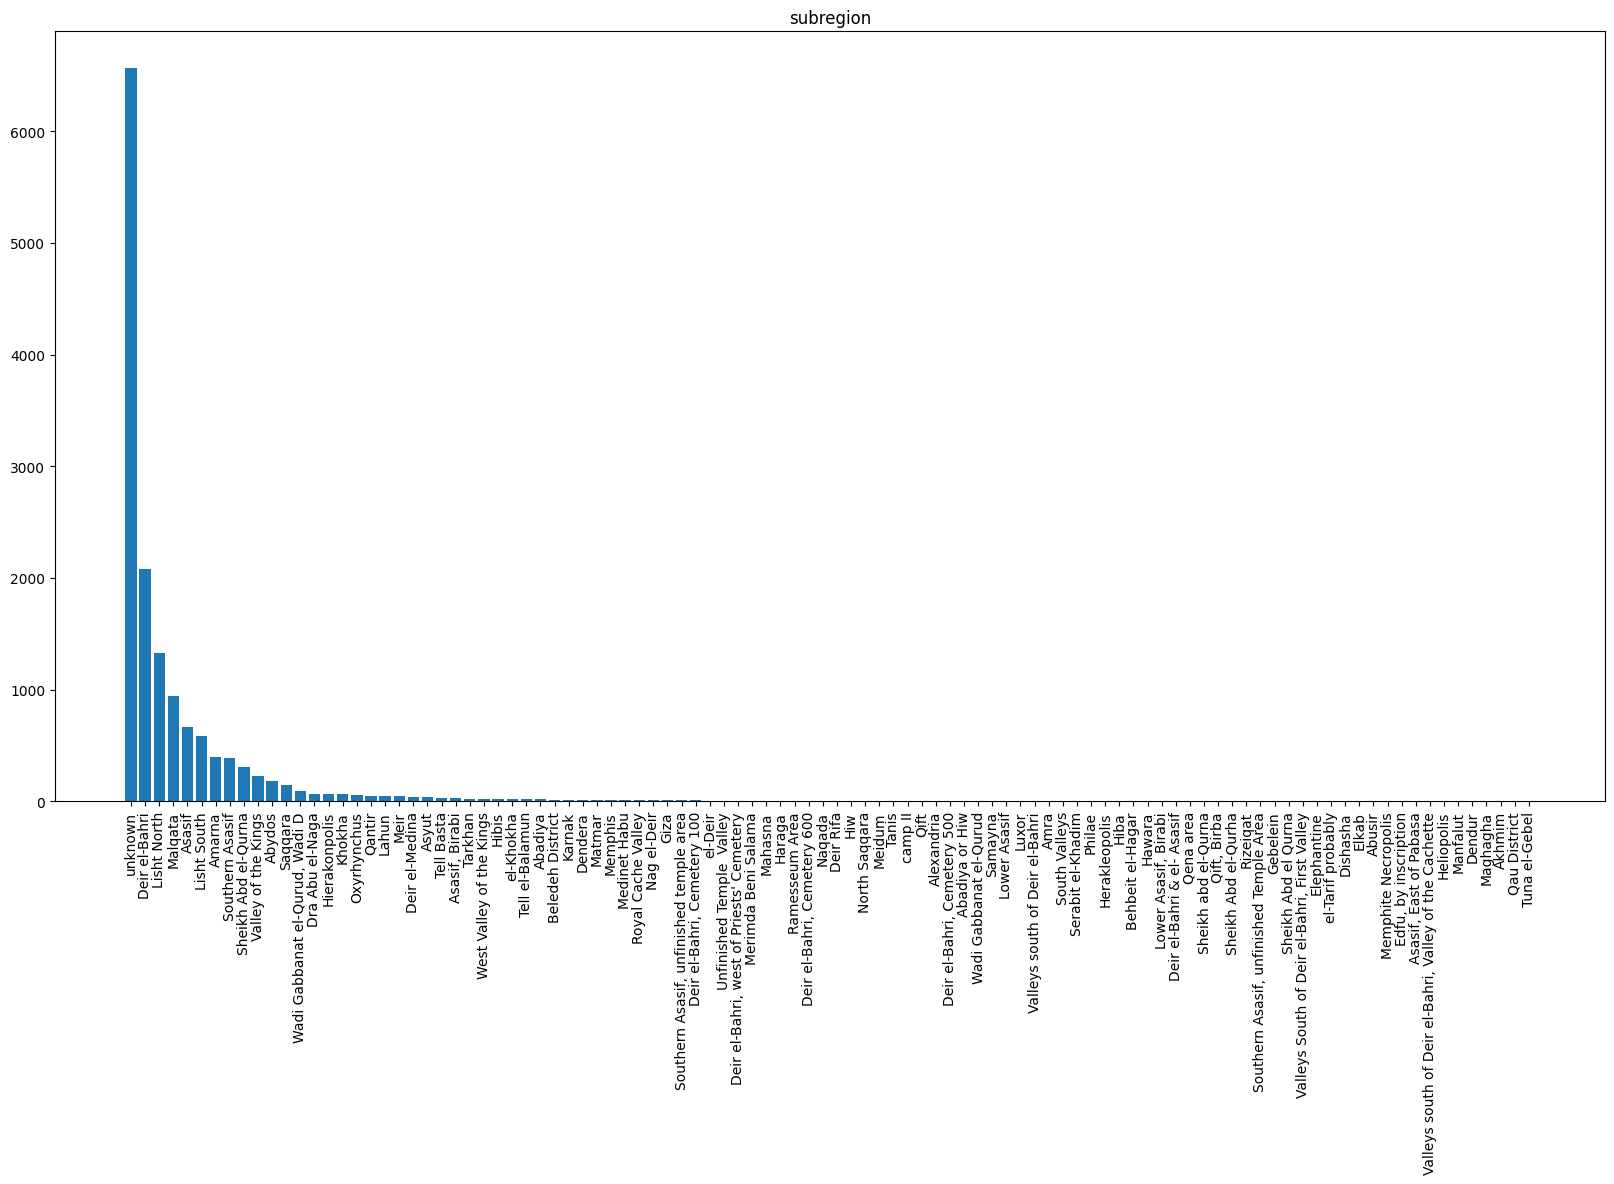

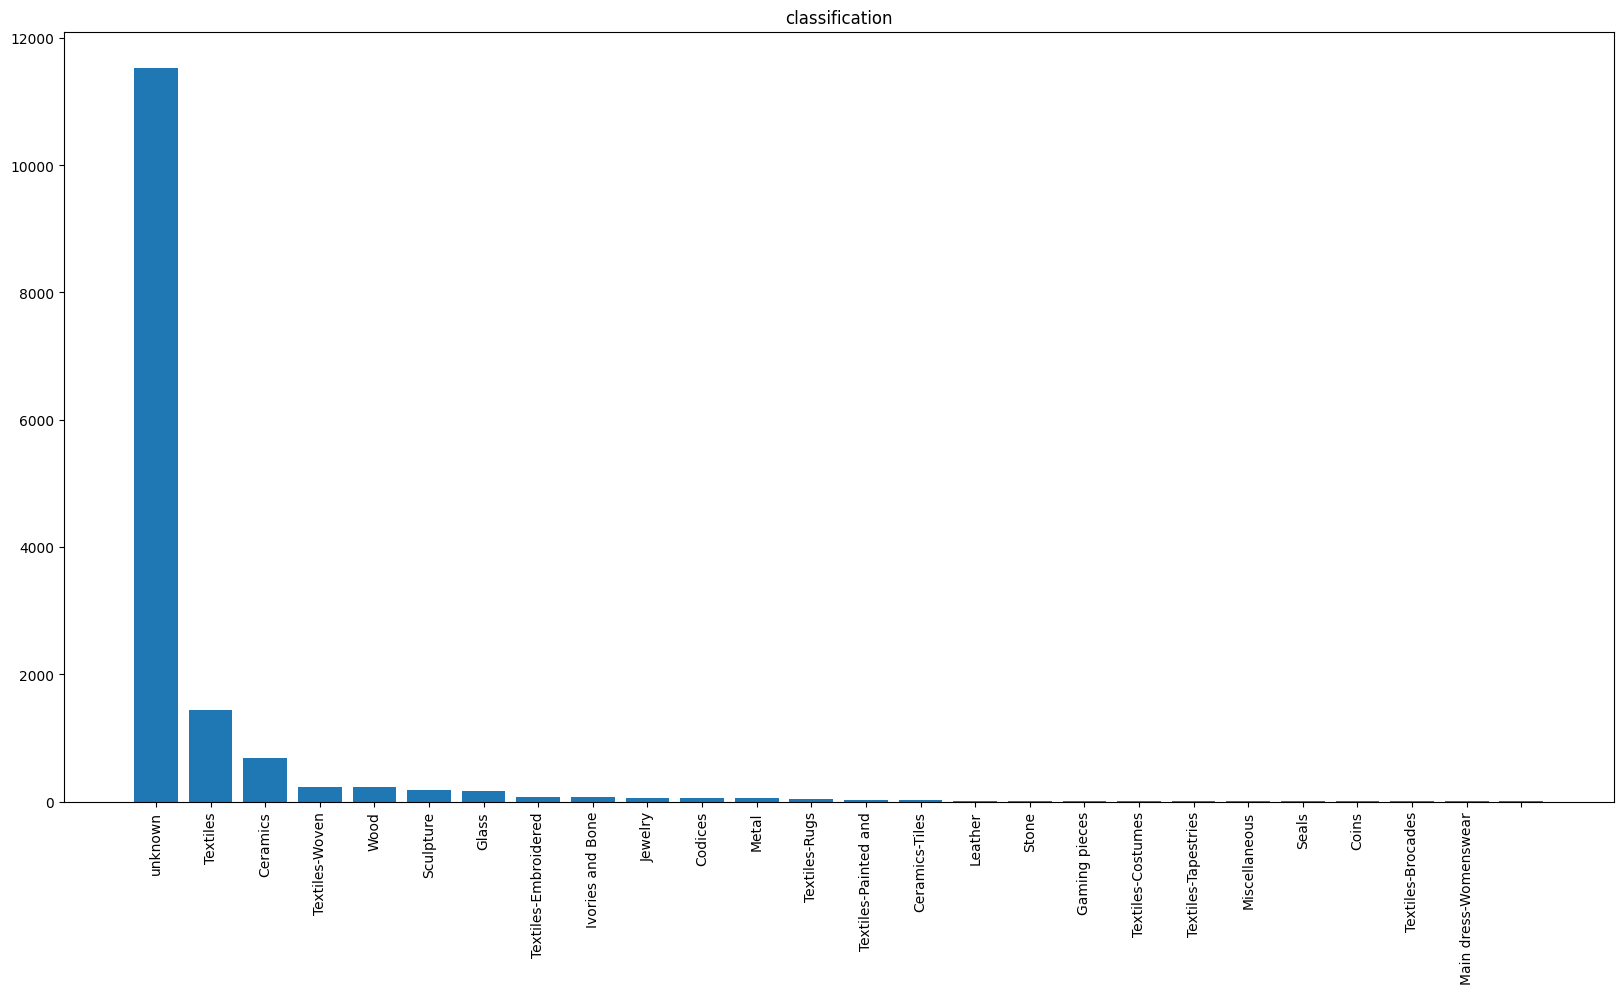

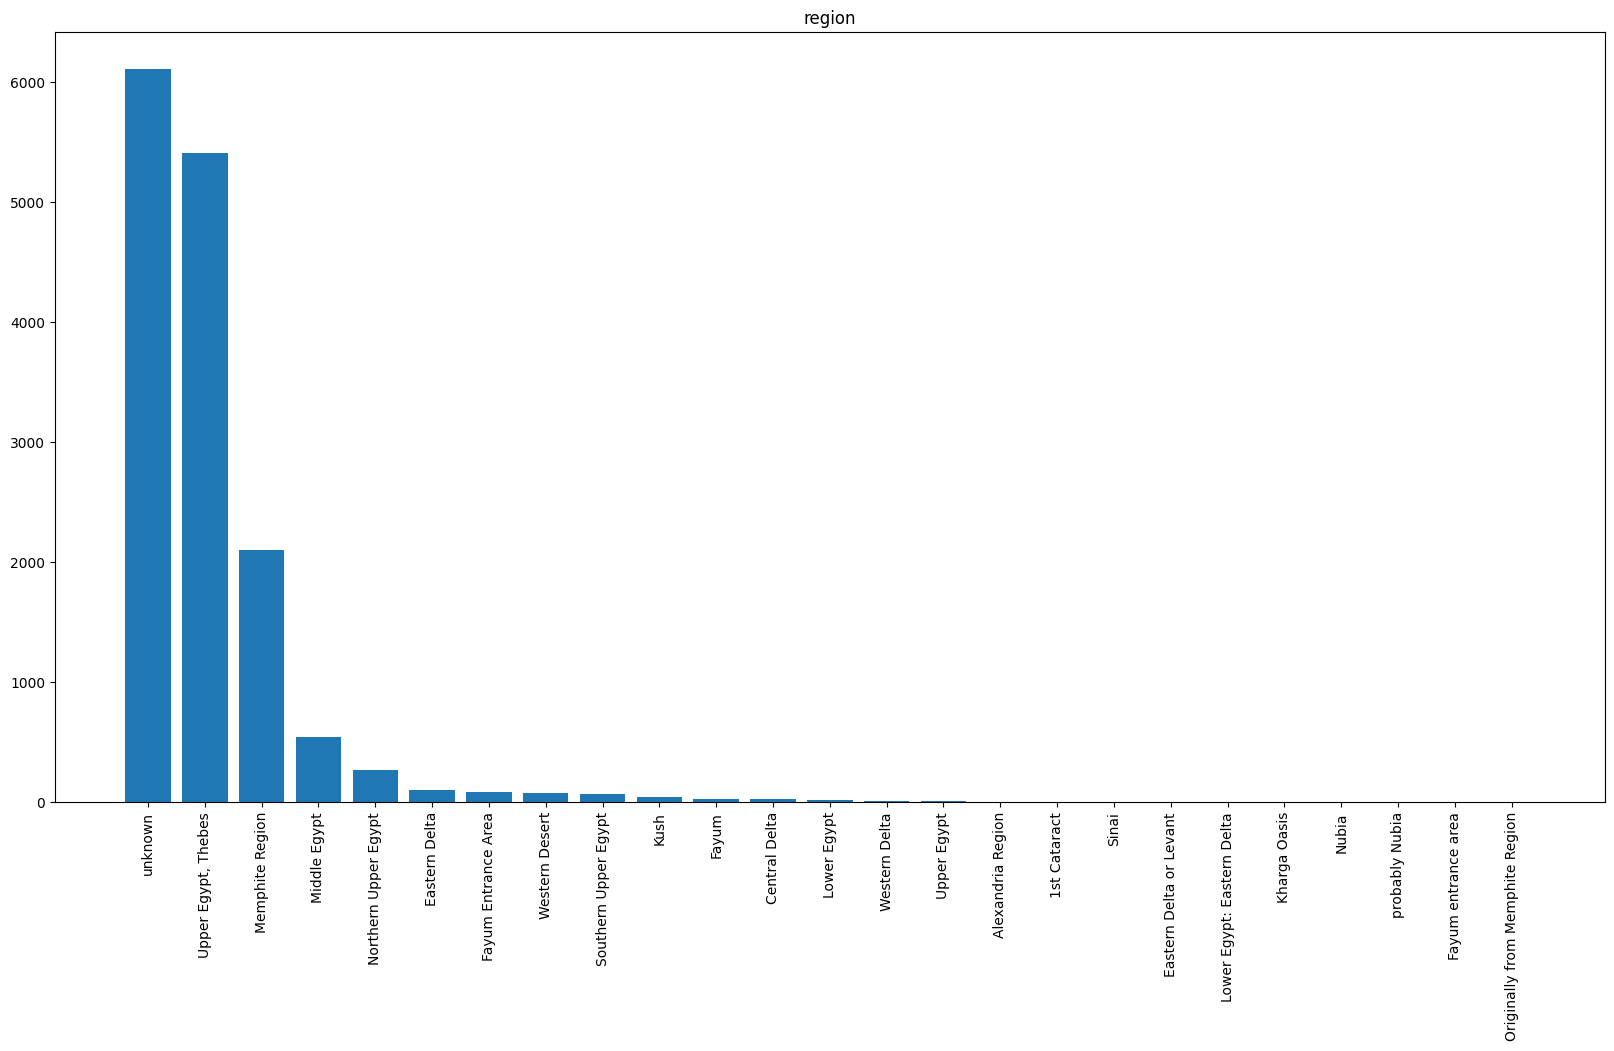

hi reign


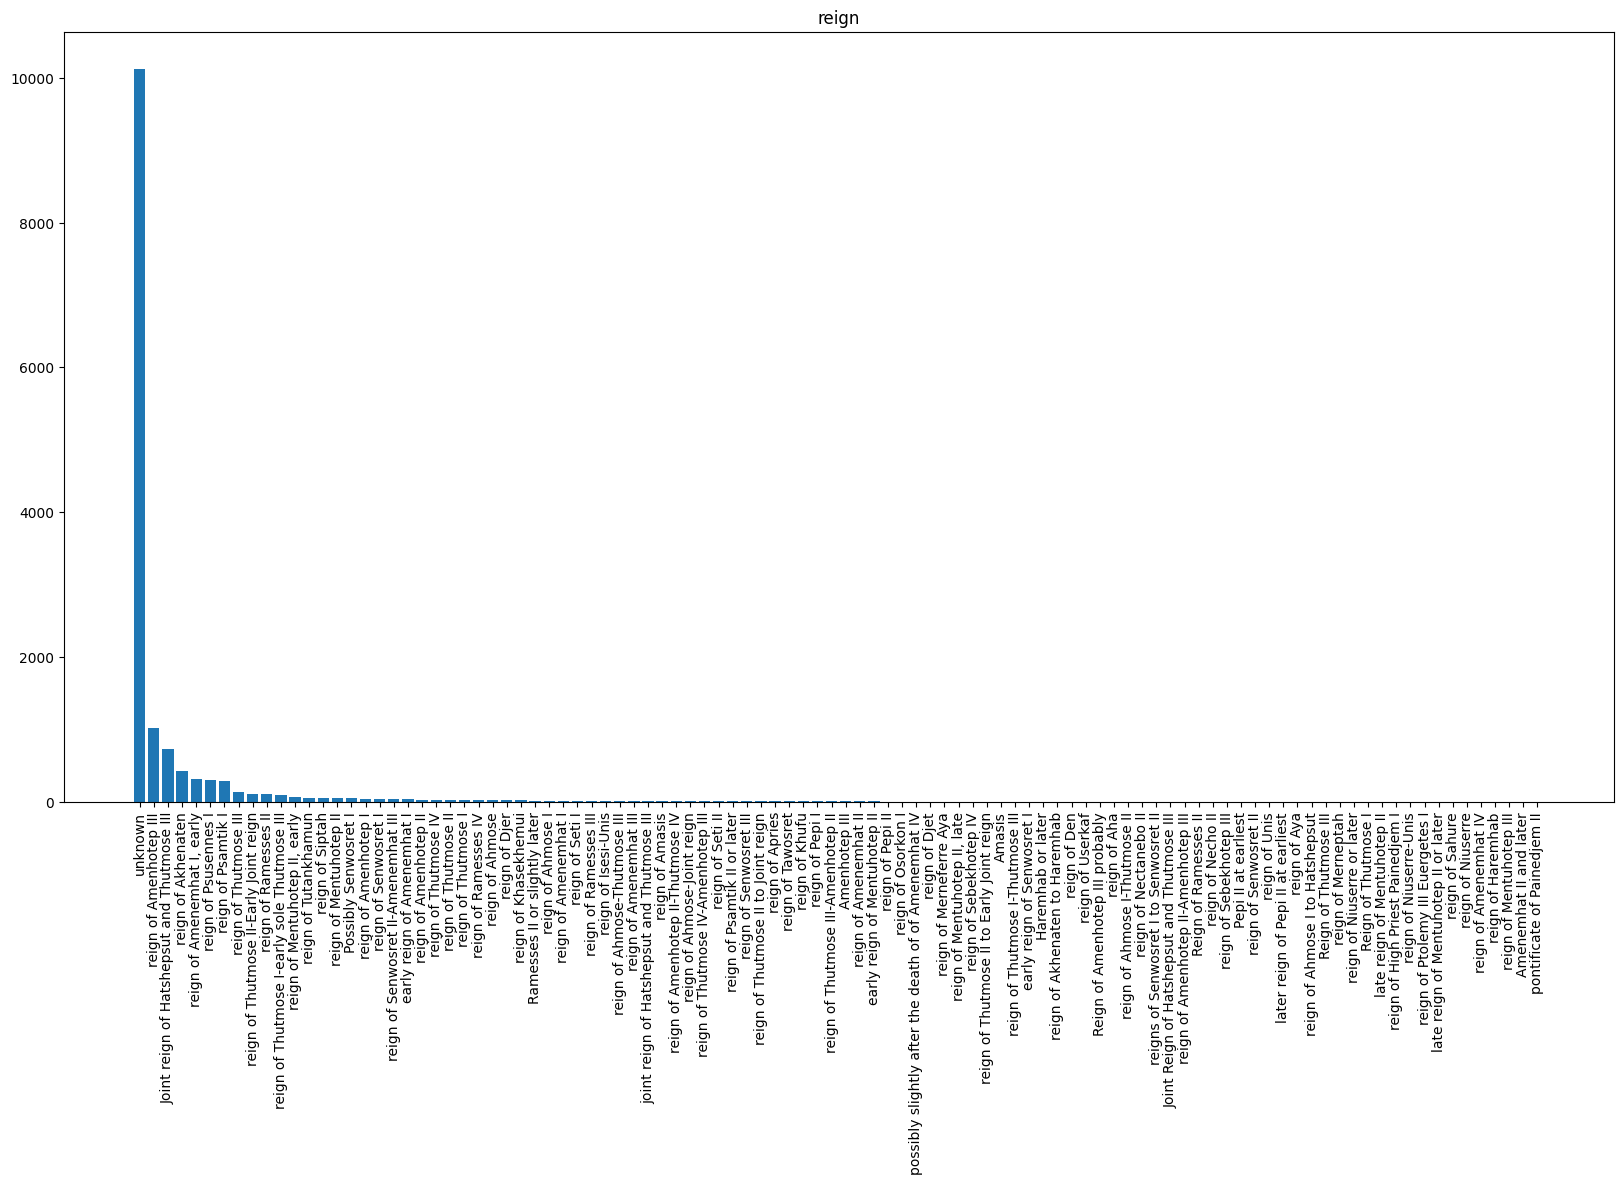

hi period


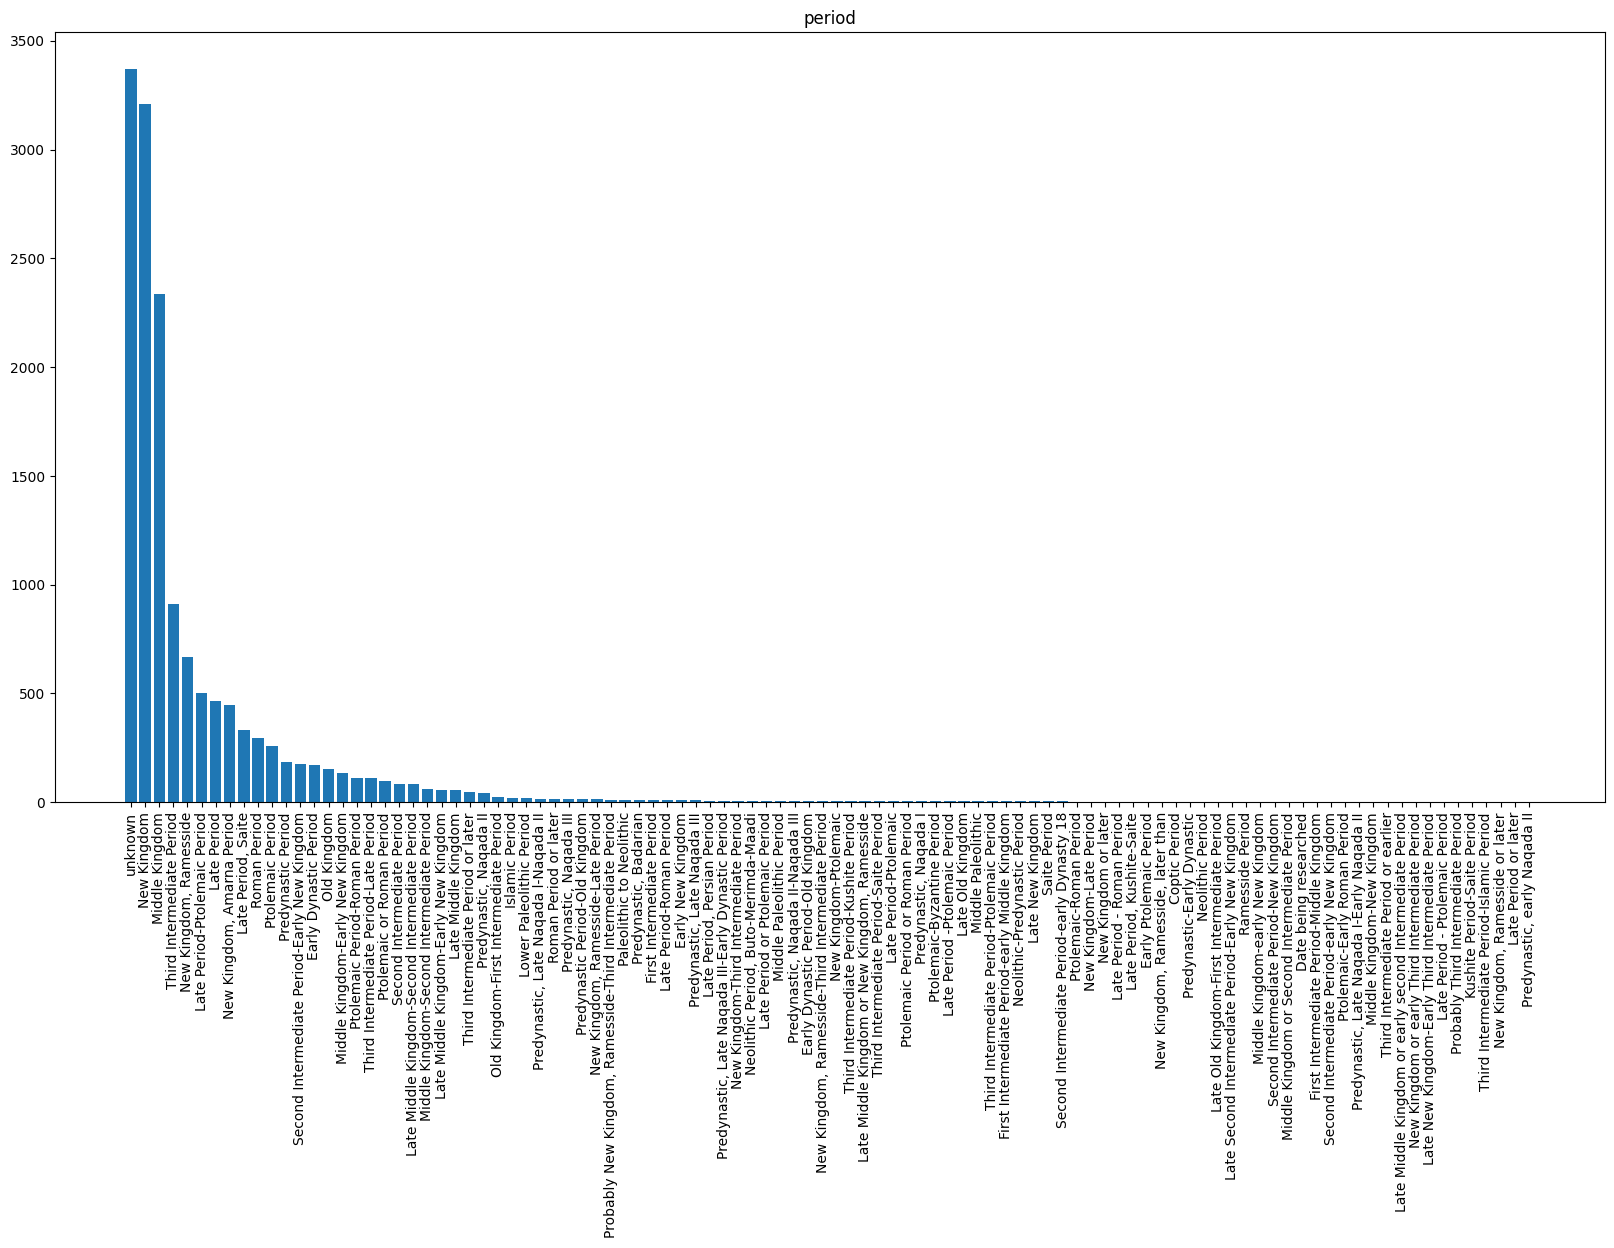

In [41]:
import matplotlib.pyplot as plt 
for i in list(df.columns):
    if len(df[i].value_counts()) <= 300:

        if len(df[i].value_counts()) >= 100:
            plt.figure(figsize=(20, 10))
            print("hi", i)
            plt.bar(df[i].value_counts().index[:100], df[i].value_counts()[:100])
            plt.xticks(rotation='vertical')
            plt.title(i)
            plt.show()
        else:
            plt.figure(figsize=(20, 10))
            plt.bar(df[i].value_counts().index, df[i].value_counts())
            plt.xticks(rotation='vertical')
            plt.title(i)
            plt.show()


In [42]:
df.to_csv("combined_Met.csv")
